In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [2]:
# Display the first five rows to get a quick look at the data
print("First five rows of the dataset:")
print(df.head())

# Display information about the DataFrame: data types and non-null counts
print("\nDataFrame info:")
print(df.info())

# Generate summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())

First five rows of the dataset:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-nu

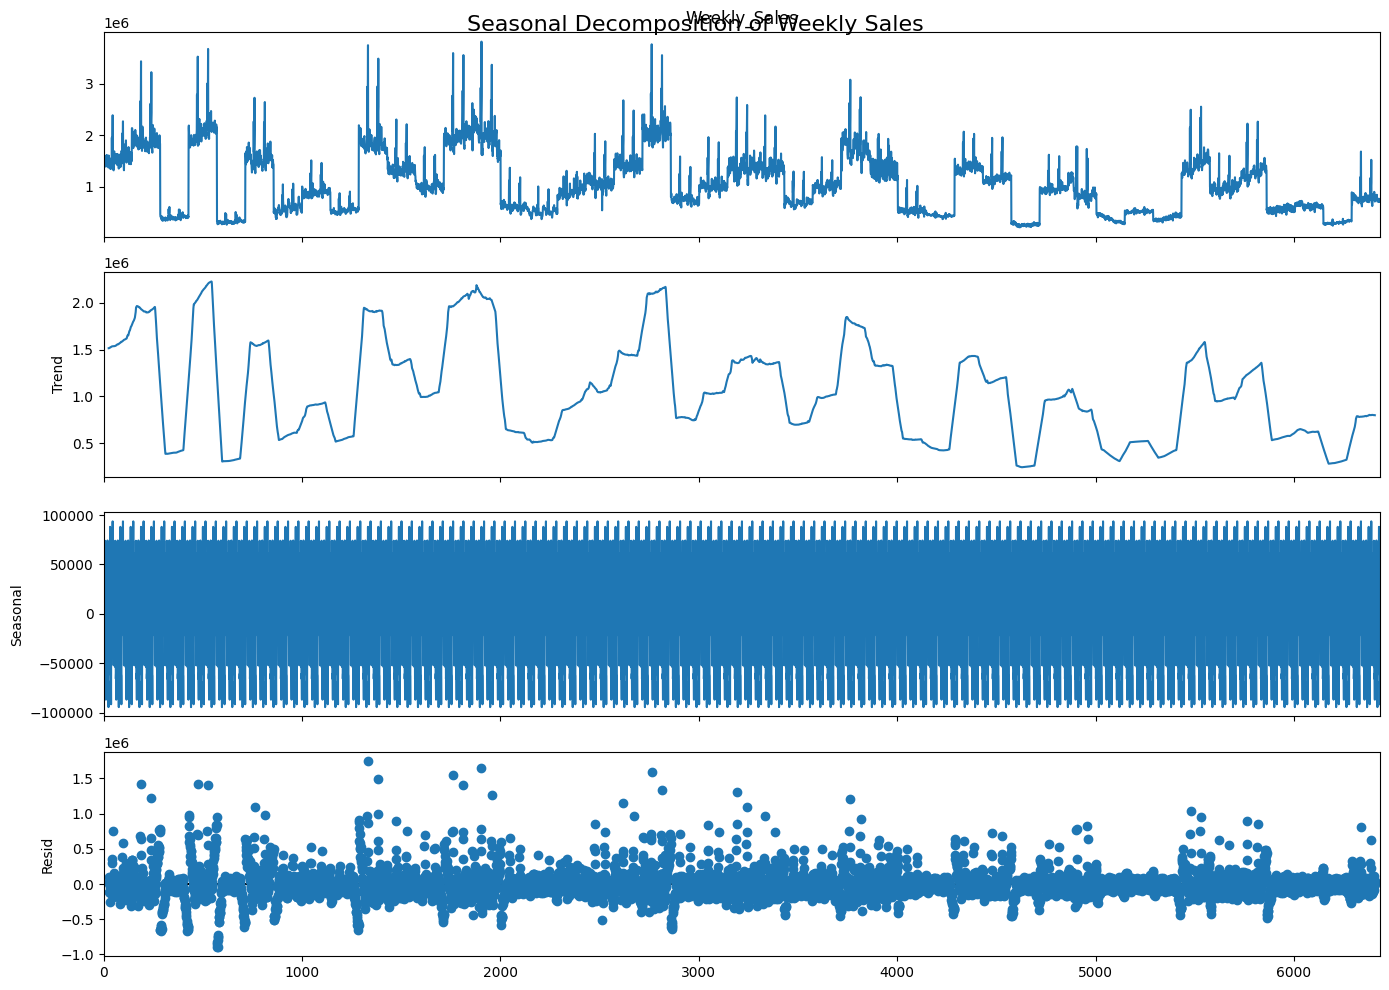

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition (using a period of 52 weeks for annual seasonality)
decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)

# Plot the decomposed components
plt.rcParams.update({'figure.figsize': (14, 10)})
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Weekly Sales", fontsize=16)
plt.show()

In [4]:
# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Filter for Store 1 only
df = df[df['Store'] == 1].copy()

# Sort by date
df.sort_values('Date', inplace=True)

# Set date as index
df.set_index('Date', inplace=True)

In [5]:
# Select target variable
y = df['Weekly_Sales']

# Select exogenous variables
X = df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

# Optional: check for missing values and fill or drop
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

# Display sample
print("Target sample:")
print(y.head())
print("\nExogenous variables sample:")
print(X.head())

Target sample:
Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

Exogenous variables sample:
            Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
Date                                                                       
2010-02-05             0        42.31       2.572  211.096358         8.106
2010-02-12             1        38.51       2.548  211.242170         8.106
2010-02-19             0        39.93       2.514  211.289143         8.106
2010-02-26             0        46.63       2.561  211.319643         8.106
2010-03-05             0        46.50       2.625  211.350143         8.106


<ipython-input-5-8636d50d0cfb>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')
<ipython-input-5-8636d50d0cfb>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method='ffill')


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

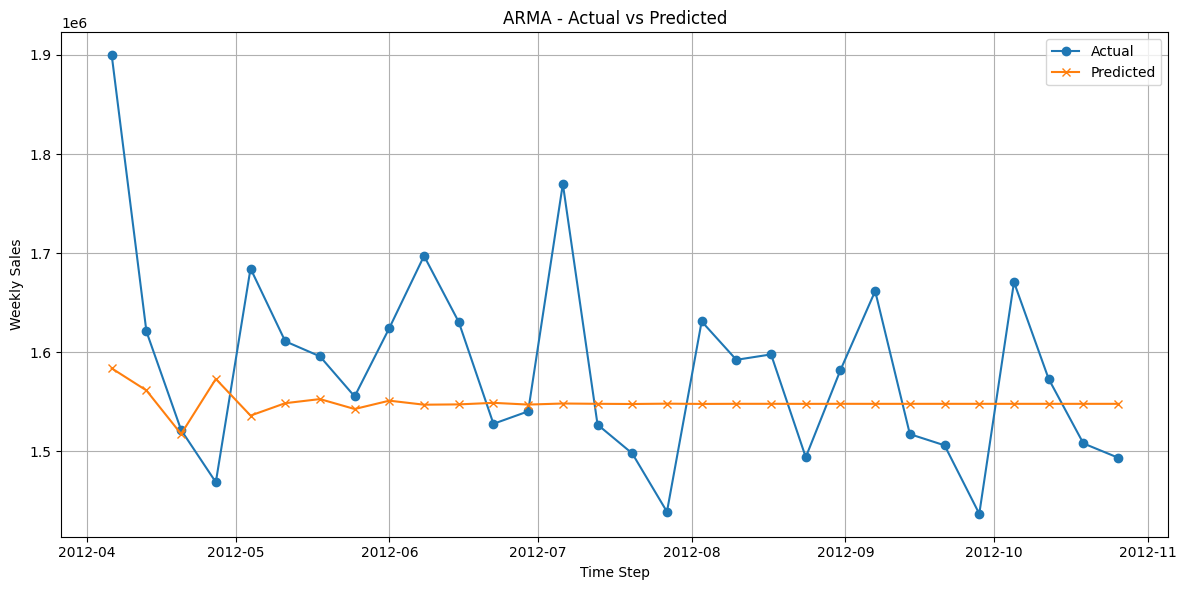

ARMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  113
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1504.064
Date:                Sat, 24 May 2025   AIC                           3020.128
Time:                        18:20:57   BIC                           3036.492
Sample:                    02-05-2010   HQIC                          3026.768
                         - 03-30-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.548e+06   2.46e+04     62.829      0.000     1.5e+06     1.6e+06
ar.L1         -1.0302      0.076    -13.468      0.000      -1.180      -0.880
ar.L2         -0.4605      0.073

In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define the plotting function
def plot_model(model_name, y_true, y_pred, n=None):
    """
    Plots actual vs predicted values for a given model.

    Args:
        model_name (str): Name to display in the plot title.
        y_true (array-like): Actual target values.
        y_pred (array-like): Predicted target values.
        n (int or None): Number of points to plot. If None, plot all.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(y_true[:n], label="Actual", marker='o')
    plt.plot(y_pred[:n], label="Predicted", marker='x')
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.xlabel("Time Step")
    plt.ylabel("Weekly Sales")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Split into train/test (last 30 weeks = test)
y_train, y_test = y[:-30], y[-30:]
X_train, X_test = X[:-30], X[-30:]

# 1. ARMA (no differencing, univariate)
arma_model = ARIMA(y_train, order=(2, 0, 2)).fit()
arma_pred = arma_model.forecast(steps=30)

# Plot predictions
plot_model("ARMA", y_test, arma_pred)

# Print model summary
print("ARMA Model Summary:")
print(arma_model.summary())
print("\n" + "="*80 + "\n")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


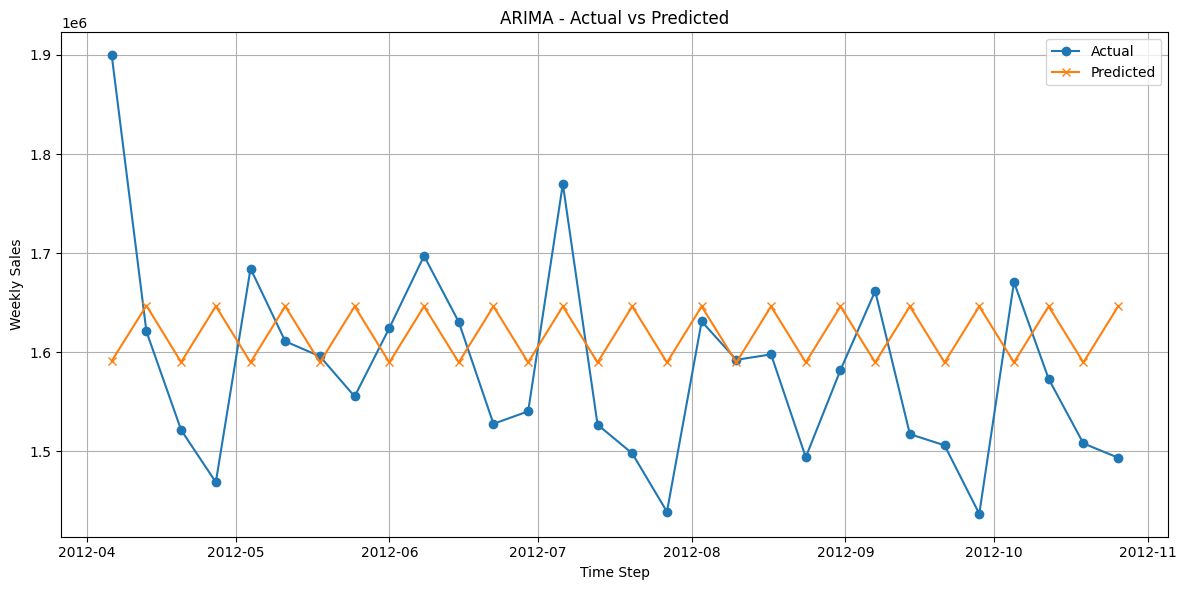

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  113
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1508.101
Date:                Sat, 24 May 2025   AIC                           3026.202
Time:                        18:21:06   BIC                           3039.795
Sample:                    02-05-2010   HQIC                          3031.717
                         - 03-30-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5301      0.089     -5.984      0.000      -0.704      -0.356
ar.L2          0.4699      0.087      5.392      0.000       0.299       0.641
ma.L1          0.0680      0.11

In [9]:
# 2. ARIMA (with differencing, univariate)
arima_model = ARIMA(y_train, order=(2, 1, 2)).fit()
arima_pred = arima_model.forecast(steps=30)
plot_model("ARIMA", y_test, arima_pred)
print("ARIMA Model Summary:")
print(arima_model.summary())
print("\n" + "="*80 + "\n")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


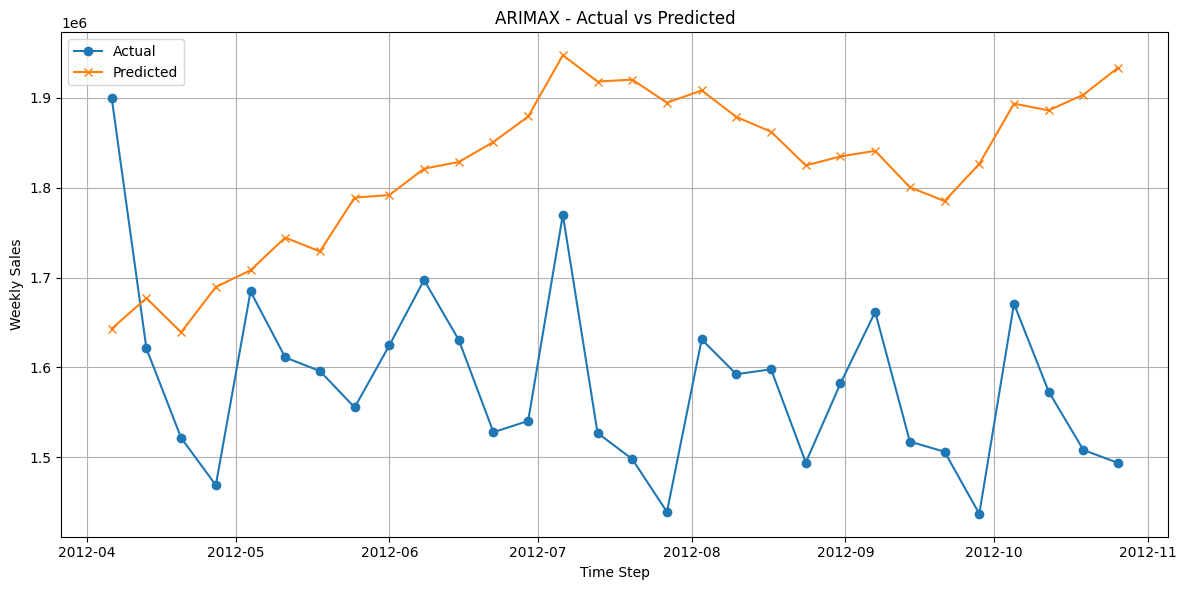

ARIMAX Model Summary:
                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  113
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1507.630
Date:                Sat, 24 May 2025   AIC                           3035.260
Time:                        18:21:10   BIC                           3062.445
Sample:                    02-05-2010   HQIC                          3046.290
                         - 03-30-2012                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Holiday_Flag   2.11e+04   4.37e+04      0.483      0.629   -6.46e+04    1.07e+05
Temperature   3182.5424   3397.324      0.937      0.349   -3476.091    9841.176
Fuel_Price   -2.808e+0

In [10]:
# 3. ARIMAX (ARIMA with exogenous variables)
arimax_model = ARIMA(y_train, exog=X_train, order=(2, 1, 2)).fit()
arimax_pred = arimax_model.forecast(steps=30, exog=X_test)
plot_model("ARIMAX", y_test, arimax_pred)

print("ARIMAX Model Summary:")
print(arimax_model.summary())
print("\n" + "="*80 + "\n")



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


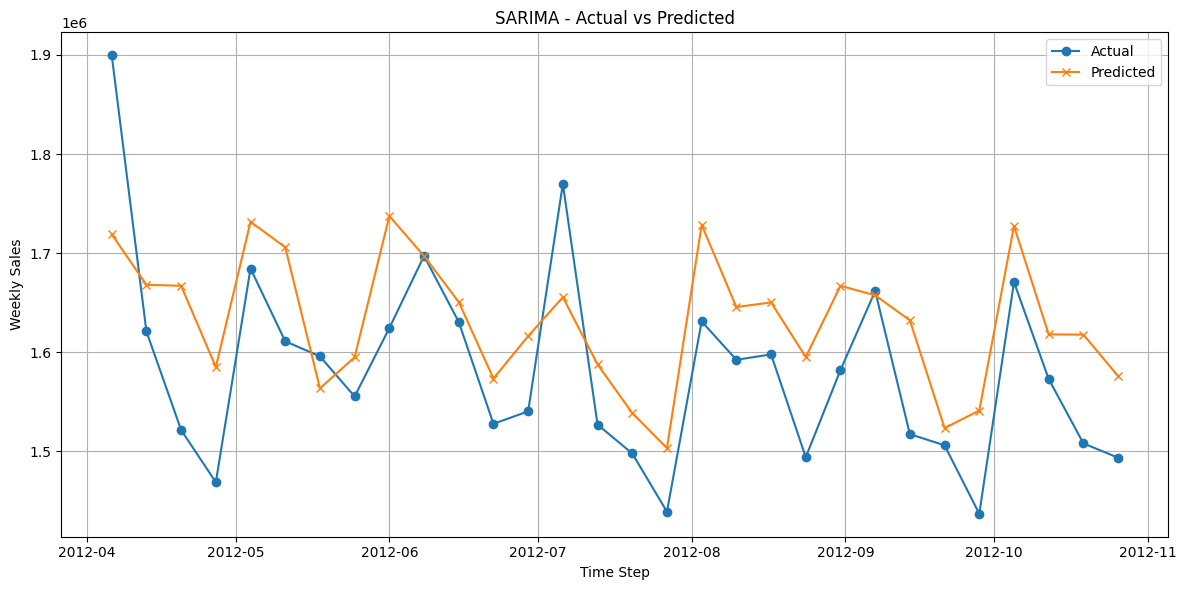

SARIMA Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:                         Weekly_Sales   No. Observations:                  113
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 52)   Log Likelihood                -757.816
Date:                              Sat, 24 May 2025   AIC                           1529.632
Time:                                      18:21:40   BIC                           1544.292
Sample:                                  02-05-2010   HQIC                          1535.366
                                       - 03-30-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8113      1.102      0.736      0.461      -1.348       2.9

In [11]:
# 4. SARIMA (seasonal, univariate)
sarima_model = SARIMAX(y_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 52)).fit()
sarima_pred = sarima_model.forecast(steps=30)
plot_model("SARIMA", y_test, sarima_pred)

print("SARIMA Model Summary:")
print(sarima_model.summary())
print("\n" + "="*80 + "\n")



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


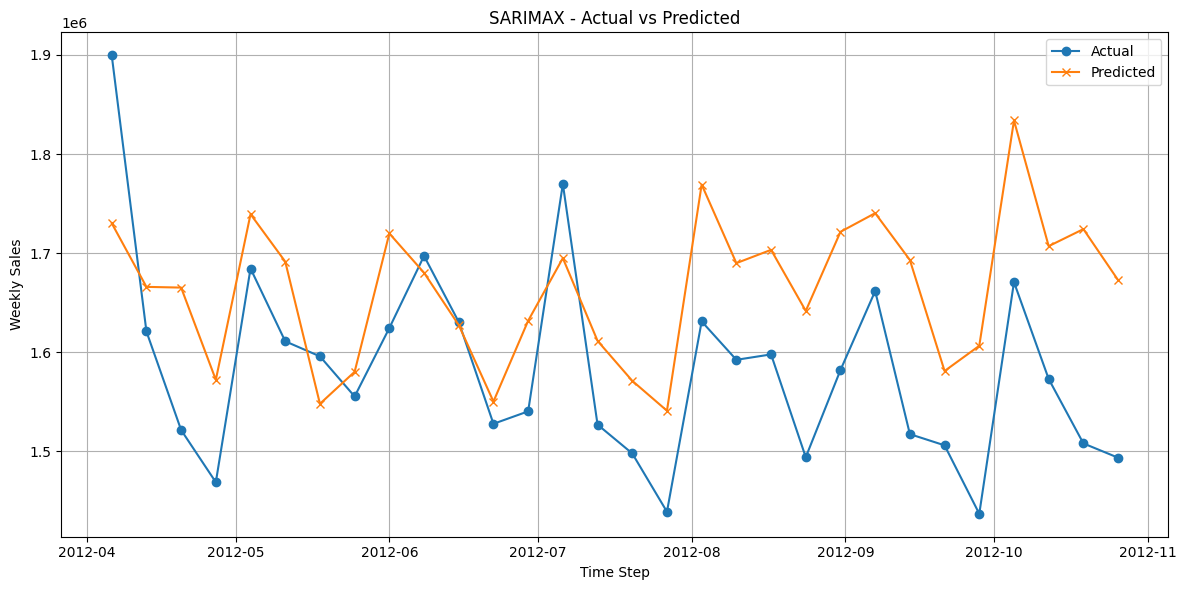

SARIMAX Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:                         Weekly_Sales   No. Observations:                  113
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 52)   Log Likelihood                -756.914
Date:                              Sat, 24 May 2025   AIC                           1537.827
Time:                                      18:22:32   BIC                           1562.960
Sample:                                  02-05-2010   HQIC                          1547.658
                                       - 03-30-2012                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Holiday_Flag     0.0001   6144.654   1.86e-08      1.000    -1.2e+04   

In [12]:
# 5. SARIMAX (seasonal + exogenous variables)
sarimax_model = SARIMAX(y_train, exog=X_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 52)).fit()
sarimax_pred = sarimax_model.forecast(steps=30, exog=X_test)
plot_model("SARIMAX", y_test, sarimax_pred)

print("SARIMAX Model Summary:")
print(sarimax_model.summary())
print("\n" + "="*80 + "\n")


In [13]:
print("Model Comparison (AIC and BIC):")
print(f"ARMA:    AIC = {arma_model.aic:.2f}, BIC = {arma_model.bic:.2f}")
print(f"ARIMA:   AIC = {arima_model.aic:.2f}, BIC = {arima_model.bic:.2f}")
print(f"ARIMAX:  AIC = {arimax_model.aic:.2f}, BIC = {arimax_model.bic:.2f}")
print(f"SARIMA:  AIC = {sarima_model.aic:.2f}, BIC = {sarima_model.bic:.2f}")
print(f"SARIMAX: AIC = {sarimax_model.aic:.2f}, BIC = {sarimax_model.bic:.2f}")


Model Comparison (AIC and BIC):
ARMA:    AIC = 3020.13, BIC = 3036.49
ARIMA:   AIC = 3026.20, BIC = 3039.79
ARIMAX:  AIC = 3035.26, BIC = 3062.45
SARIMA:  AIC = 1529.63, BIC = 1544.29
SARIMAX: AIC = 1537.83, BIC = 1562.96


SARIMA has the lowest AIC (1529.63) and BIC (1544.29).
This means it balances fit and complexity best.
It captures seasonality well, which seems important in your data.

SARIMAX comes next but has higher AIC (1537.83) and BIC (1562.96).
Adding exogenous variables increased complexity but didn’t improve the fit enough.

ARMA, ARIMA, and ARIMAX have much higher AIC and BIC, indicating poorer fit or lack of handling seasonality properly.

Best model:
SARIMA.

Reason:
It models the seasonal patterns clearly and keeps the model simpler than SARIMAX. The big drop in AIC and BIC compared to others shows it fits your weekly sales data best without overfitting.

Conclusion:
Use SARIMA for forecasting weekly sales in Store 1. It accounts for yearly seasonal cycles and trends in your data. Adding external variables didn’t improve the model enough to justify added complexity. Focus on refining SARIMA for better accuracy.

<ipython-input-20-c1e212fbe988>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')
<ipython-input-20-c1e212fbe988>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method='ffill')


Random Forest MSE: 4900560956.521264


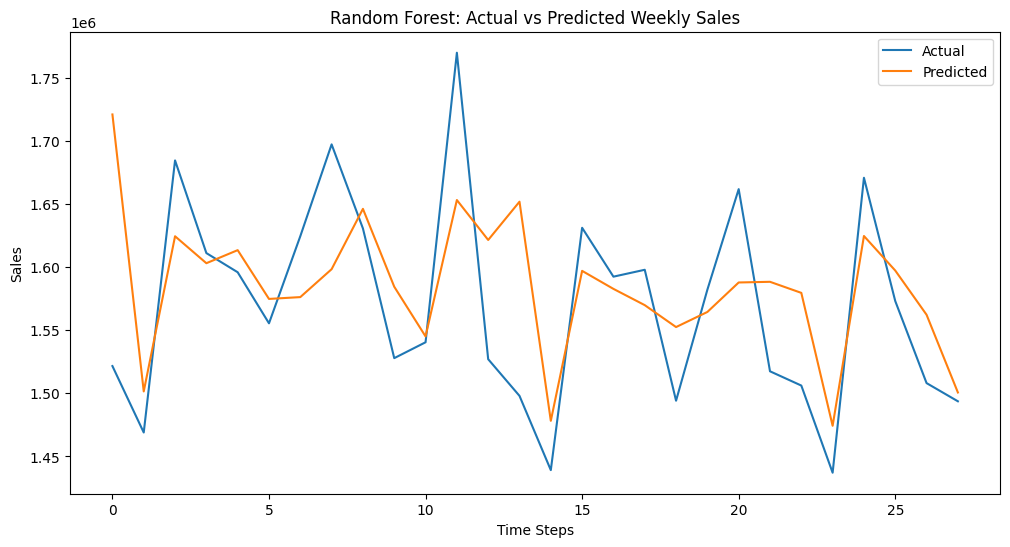

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df.reset_index(inplace=True)  # This will bring 'Date' back as a column
# Load and preprocess (assuming 'df' is your DataFrame)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df[df['Store'] == 1].copy()
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Define base features and target
y = df['Weekly_Sales']
X = df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].copy()
X = X.fillna(method='ffill')
y = y.fillna(method='ffill')

# Combine into one DataFrame for feature engineering
df_fe = X.copy()
df_fe['Weekly_Sales'] = y

# --- Feature Engineering ---

# Lag features
for lag in range(1, 4):
    df_fe[f'lag_{lag}'] = df_fe['Weekly_Sales'].shift(lag)

# Rolling mean and std
df_fe['rolling_mean_3'] = df_fe['Weekly_Sales'].rolling(window=3).mean()
df_fe['rolling_std_3'] = df_fe['Weekly_Sales'].rolling(window=3).std()

# Drop NaN rows
df_fe.dropna(inplace=True)

# Final X and y
feature_cols = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
                'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_std_3']
X_fe = df_fe[feature_cols]
y_fe = df_fe['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fe, y_fe, test_size=0.2, shuffle=False)

# --- Random Forest Regressor ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("Random Forest MSE:", mse)

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(preds, label='Predicted')
plt.title("Random Forest: Actual vs Predicted Weekly Sales")
plt.xlabel("Time Steps")
plt.ylabel("Sales")
plt.legend()
plt.show()
